In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import os

#import pandas
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error


import tensorflow as tf

from tensorflow.keras import layers

In [2]:
caracteres={'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}

In [3]:
VOCABULARIO=len(caracteres)
LONGITUD=6
FICHERO_PESOS="modelos/pesosNN.hdf5"

In [4]:
iniciar=True

#Indicamos un valor de semilla para el generador de números aleatorios
np.random.seed(7)
#dataset = pandas.read_csv('entrenamiento1.csv', engine='python')
dataset=np.array(range(40000))
#print(dataset)
datos=[]
entrenamiento=[]
salida=[]
#for i in range(len(dataset)):
#    datos.append([list(format(dataset['entrada'][i], '04')),list(format(dataset['salida'][i], '04'))])
#    entrenamiento.append([caracteres[c] for c in datos[i][0]])
#    salida.append([caracteres[c] for c in datos[i][1]])
for i in range(len(dataset)):
    datos.append([list(format(dataset[i], "0"+str(LONGITUD))),list(format(dataset[i]+1, "0"+str(LONGITUD)))])
    entrenamiento.append([caracteres[c] for c in datos[i][0]])
    salida.append([caracteres[c] for c in datos[i][1]])
#print(datos)
#print(entrenamiento)
#print(salida)

entrenamiento = np.array(entrenamiento)
entrenamiento = np.reshape(entrenamiento, (len(dataset), LONGITUD,1))
entrenamiento = entrenamiento/float(VOCABULARIO)
#print(entrenamiento)
salida = np.array(salida)
salida = tf.keras.utils.to_categorical(salida)
#salida = np.reshape(salida, (salida.shape[0], salida.shape[1],LONGITUD))
#salida = salida/float(10)
#salida=np.expand_dims(salida,2)
#salida = np.reshape(salida, (salida.shape[0], salida.shape[1],1))
print(entrenamiento.shape)
print(salida.shape)
#dataset=dataset.values
#dataset=dataset.astype('float32')

##normalizamos los datos. Normalizar es poner entre [0,1]
#escaler = MinMaxScaler(feature_range=(0, 1))
#datos = escaler.fit_transform(datos)
#datos=np.array(datos)
#datos=datos/float(10)
#print(datos)

##Separamos los datos 
#tamañoEntranamiento = int(len(dataset) * 0.67)
#entrenamiento, test = dataset[0:tamañoEntranamiento,:], dataset[tamañoEntranamiento:len(dataset),:]
#print(entrenamiento, test)
#print(len(entrenamiento),len(test),len(dataset))

(40000, 6, 1)
(40000, 6, 10)


In [5]:
def construirModelo(vocabulario):
    model = tf.keras.Sequential()
    #model.add(layers.Dense(256, input_shape = (4, 1)))
    #model.add(layers.Dense(128, activation='relu'))
    #model.add(layers.Dense(64, activation='relu'))
    #model.add(layers.Dense(512, input_shape = (4, 1)))
    #model.add(layers.Dense(256, activation='relu'))
    #model.add(layers.Dense(128, activation='relu'))
    #model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(512, activation='relu',input_shape=(LONGITUD,1)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(vocabulario, activation = 'softmax')) #'softmax', 'sigmoid', 'tanh', 'relu'
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model



In [7]:
model = construirModelo(VOCABULARIO)
if(os.path.isfile(FICHERO_PESOS) and not iniciar):
    model.load_weights(FICHERO_PESOS)
iniciar=False
checkpoint = tf.keras.callbacks.ModelCheckpoint(FICHERO_PESOS, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
print(model.summary())
history = model.fit(entrenamiento, salida, validation_split=0.05, epochs = 10, batch_size = 128, callbacks = callbacks_list, shuffle=True).history



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6, 512)            1024      
_________________________________________________________________
dense_5 (Dense)              (None, 6, 128)            65664     
_________________________________________________________________
dense_6 (Dense)              (None, 6, 64)             8256      
_________________________________________________________________
dense_7 (Dense)              (None, 6, 10)             650       
Total params: 75,594
Trainable params: 75,594
Non-trainable params: 0
_________________________________________________________________
None
Train on 38000 samples, validate on 2000 samples
Epoch 1/10
36992/38000 [============================>.] - ETA: 0s - loss: 0.9289 - accuracy: 0.6991
Epoch 00001: loss improved from inf to 0.91702, saving model to modelos/pesosNN.hdf5
38000/380

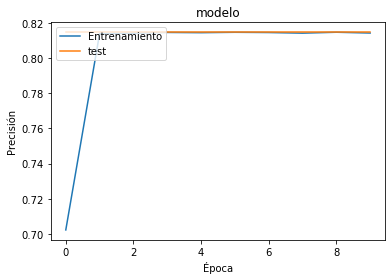

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#from pylab import rcParams
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#rcPatams['figure.figsize']=12, 5

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'test'],loc='upper left')

In [9]:


model = construirModelo(VOCABULARIO)
model.load_weights(FICHERO_PESOS)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')



In [10]:
import ipywidgets as widgets
#from IPython.display import clear_output
textoOriginal = []
prediccion = []
def submit(datos):
    global textoOriginal
    global prediccion
    
    listaTextoCompleto = list(text.value)
    
    listaCaracteresSinProcesar = listaTextoCompleto[len(textoOriginal):]
    textoProcesado = listaTextoCompleto[:len(textoOriginal)]    
    textoCompleto = text.value    
    #palabraSinProcesar.append(' ')
    
    textoAnterior = [caracteres[c] for c in listaTextoCompleto]
    ultimoTexto = [caracteres[c] for c in listaCaracteresSinProcesar]
    
    numero=[]
    
    X=np.array([ultimoTexto])
    X = np.reshape(X, (1, LONGITUD, 1))
    siguienteNumero = model.predict(X/float(VOCABULARIO))
    #print(siguienteNumero)
    for i in range(len(siguienteNumero[0])):
        index = np.argmax(siguienteNumero[0][i])    
        numero.append(str(index))
    #
    pronostico.clear_output()
    with pronostico:
        print( ''.join(numero))
    
    #display(text)
    #text.focus_set()

In [11]:
pronostico=widgets.Output()

text = widgets.Text()
text.value="000006"
display(text,pronostico)
submit([])

text.on_submit(submit)

Text(value='000006')

Output()